# 0.Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
import seaborn as sns

In [3]:
import pandas as pd
import joblib
import warnings;warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [4]:
pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 100)
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

# Modeling
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [5]:
from plotnine import *
import plotnine
plt.style.use('ggplot')
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [6]:
# Data Handling
import pandas as pd
import numpy as np


# OS
import os
import time
import warnings;warnings.filterwarnings('ignore')
from tqdm import tqdm


# Visualization
import matplotlib.pyplot as plt
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
import klib


# Preprocessing & Feature Engineering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import itertools
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import KFold


# Statistics
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import scipy.stats as stats


# Modeling
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


# Evaluation
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score

# 1.Data Load

In [7]:
data_or = pd.read_csv('../Data/train_test.csv').drop(['act_id','iem_cd','byn_dt','bse_dt','iem_krl_nm'],axis=1)
f1 = pd.read_csv('../Data/feature_kms.csv').drop(['Unnamed: 0'],axis=1)
f2 = pd.read_csv('../Data/feature_ygy.csv')
f3 = pd.read_csv('../Data/feature_ohs.csv',encoding='cp949')
train_label = pd.read_csv('../Data/train_label.csv')
submission = pd.read_csv("../Data/sample_submission.csv")
test = pd.read_csv("../Data/stk_hld_test.csv")

In [8]:
display(data_or.head())
print(data_or.shape)

,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p
0,5.0,1,9,3,2,2,9,5,5,8,14,1,1,274.0,11782000.0,5000.0,43000.0
1,40.0,1,9,3,2,2,9,5,5,8,14,1,1,2.0,4990000.0,5000.0,2495000.0
2,2.0,1,9,3,2,2,9,5,5,8,14,2,99,786.0,14619600.0,1000.0,18600.0
3,11.0,1,9,3,2,2,9,5,5,8,14,2,1,60.0,462000.0,500.0,7700.0
4,162.0,1,9,3,2,2,9,5,5,8,14,3,99,183.0,8125200.0,5000.0,44400.0


(752068, 17)


In [9]:
display(f1.head())
print(f1.shape)

,hist_2016,hist_2017,hist_2018,hist_2019,hist_2020,buy_person_cnt,cnt_by_iem,daycnt_by_iem,transcation_cnt_perday,big_stock_cnt,middle_stock_cnt,small_stock_cnt,etc_stock_cnt
0,0,0,1,0,0,423,2917,798,3.655388,0.33213,0.368231,0.299639,0.0
1,0,0,1,0,0,5964,61617,1089,56.581267,0.33213,0.368231,0.299639,0.0
2,0,0,1,0,0,615,3052,642,4.753894,0.33213,0.368231,0.299639,0.0
3,0,0,0,0,1,665,3064,681,4.499266,0.33213,0.368231,0.299639,0.0
4,0,0,1,1,1,121,926,450,2.057778,0.33213,0.368231,0.299639,0.0


(752068, 13)


In [10]:
display(f2.head())
print(f2.shape)

,byn_dt_last,hist/tot_h,hist/tot_l,hist/tot_m,byn_last_h,byn_last_l,byn_last_m,hold_hist_t,bnc_qty_s,tot_aet_amt_s,tot_aet/aet_stn_h,tot_aet/aet_stn_l,tot_aet/aet_stn_m,profit/tot_aet,profit/tot_bnc_qty,bnc_qty/tot_bnc_qty,aet_amt/tot_aet
0,5.0,0.001370,0.002741,0.001957,0.001370,0.002741,0.001957,6,836.0,33585800.0,0.392733,1.17820,0.58910,0.008488,756.717943,0.007567,0.030762
1,40.0,0.010962,0.021930,0.015656,0.010962,0.021930,0.015656,9,2094.0,177414100.0,0.166333,0.49900,0.24950,0.020040,5.523489,0.000055,0.013029
2,2.0,0.000548,0.001096,0.000783,0.000548,0.001096,0.000783,3,986.0,18499600.0,0.487320,1.46196,0.73098,0.006840,2170.731034,0.021707,0.038171
3,11.0,0.003015,0.006031,0.004305,0.003015,0.006031,0.004305,2,60.0,462000.0,0.015400,0.04620,0.02310,0.216450,165.704659,0.001657,0.001206
4,76.0,0.044396,0.088816,0.063405,0.020828,0.041667,0.029746,4,329.0,12863700.0,0.270840,0.81252,0.40626,0.012307,505.399210,0.005054,0.021214


(752068, 17)


In [11]:
display(f3.head())
print(f3.shape)

,계좌별_평균_일매수_수량,계좌별_최고_일매수_수량,계좌별_매수_최소_주당금액,계좌별_매수_최대_주당금액,계좌별_매수_평균_주당금액,계좌별_최대보유기간,계좌별_평균보유기간,계좌별_평균_일매수매도_수량,계좌별_최고_일매수매도_수량,계좌별_매수매도_최소_주당금액,계좌별_매수매도_최대_주당금액,계좌별_매수매도_평균_주당금액,종목별_평균_일매수_수량,종목별_최고_일매수_수량,종목별_매수_최소_주당금액,종목별_매수_최대_주당금액,종목별_매수_평균_주당금액,종목별_최대보유기간,종목별_평균보유기간,종목별_평균_일매수매도_수량,종목별_최고_일매수매도_수량,종목별_매수매도_최소_주당금액,종목별_매수매도_최대_주당금액,종목별_매수매도_평균_주당금액
0,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,81.929386,4180.0,15050.0,54500.0,33617.870722,1199,86.673759,5.019541,4180.0,15050.0,54700.0,33766.292382
1,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,58.553245,33663.0,37450.0,2861000.0,102148.313648,1227,160.183769,4.892984,33663.0,37450.0,2861000.0,106562.678811
2,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,163.768445,12624.0,2745.0,28350.0,14512.959705,724,64.793496,3.230341,12624.0,2745.0,28350.0,14610.070841
3,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,420.110738,13096.0,3695.0,12800.0,7718.112416,923,63.845113,24.012728,13096.0,3695.0,12800.0,7734.231486
4,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,49.827094,1600.0,18700.0,50100.0,33056.417112,640,70.685950,1.714903,1600.0,18700.0,50100.0,33346.953642


(752068, 24)


In [12]:
display(train_label.head())
print(train_label.shape)

,hold_d
0,11
1,80
2,5
3,22
4,324


(681472, 1)


In [13]:
display(submission.head())
print(submission.shape)

,submit_id,hold_d
0,IDX00001,0
1,IDX00002,0
2,IDX00003,0
3,IDX00004,0
4,IDX00005,0


(70596, 2)


In [14]:
display(test.head())
print(test.shape)

,act_id,iem_cd,byn_dt,hist_d,submit_id,hold_d
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,20200522,153,IDX00001,0
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A160600,20190823,335,IDX00002,0
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A234340,20200611,139,IDX00003,0
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A131760,20200120,236,IDX00004,0
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A293490,20201217,9,IDX00005,0


(70596, 6)


# 2.Data Merge & Split

In [15]:
df = pd.concat([data_or,f2,f3],axis=1)

In [16]:
display(df.head())
print(df.shape)

,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p,byn_dt_last,hist/tot_h,hist/tot_l,hist/tot_m,byn_last_h,byn_last_l,byn_last_m,hold_hist_t,bnc_qty_s,tot_aet_amt_s,tot_aet/aet_stn_h,tot_aet/aet_stn_l,tot_aet/aet_stn_m,profit/tot_aet,profit/tot_bnc_qty,bnc_qty/tot_bnc_qty,aet_amt/tot_aet,계좌별_평균_일매수_수량,계좌별_최고_일매수_수량,계좌별_매수_최소_주당금액,계좌별_매수_최대_주당금액,계좌별_매수_평균_주당금액,계좌별_최대보유기간,계좌별_평균보유기간,계좌별_평균_일매수매도_수량,계좌별_최고_일매수매도_수량,계좌별_매수매도_최소_주당금액,계좌별_매수매도_최대_주당금액,계좌별_매수매도_평균_주당금액,종목별_평균_일매수_수량,종목별_최고_일매수_수량,종목별_매수_최소_주당금액,종목별_매수_최대_주당금액,종목별_매수_평균_주당금액,종목별_최대보유기간,종목별_평균보유기간,종목별_평균_일매수매도_수량,종목별_최고_일매수매도_수량,종목별_매수매도_최소_주당금액,종목별_매수매도_최대_주당금액,종목별_매수매도_평균_주당금액
0,5.0,1,9,3,2,2,9,5,5,8,14,1,1,274.0,11782000.0,5000.0,43000.0,5.0,0.001370,0.002741,0.001957,0.001370,0.002741,0.001957,6,836.0,33585800.0,0.392733,1.17820,0.58910,0.008488,756.717943,0.007567,0.030762,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,81.929386,4180.0,15050.0,54500.0,33617.870722,1199,86.673759,5.019541,4180.0,15050.0,54700.0,33766.292382
1,40.0,1,9,3,2,2,9,5,5,8,14,1,1,2.0,4990000.0,5000.0,2495000.0,40.0,0.010962,0.021930,0.015656,0.010962,0.021930,0.015656,9,2094.0,177414100.0,0.166333,0.49900,0.24950,0.020040,5.523489,0.000055,0.013029,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,58.553245,33663.0,37450.0,2861000.0,102148.313648,1227,160.183769,4.892984,33663.0,37450.0,2861000.0,106562.678811
2,2.0,1,9,3,2,2,9,5,5,8,14,2,99,786.0,14619600.0,1000.0,18600.0,2.0,0.000548,0.001096,0.000783,0.000548,0.001096,0.000783,3,986.0,18499600.0,0.487320,1.46196,0.73098,0.006840,2170.731034,0.021707,0.038171,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,163.768445,12624.0,2745.0,28350.0,14512.959705,724,64.793496,3.230341,12624.0,2745.0,28350.0,14610.070841
3,11.0,1,9,3,2,2,9,5,5,8,14,2,1,60.0,462000.0,500.0,7700.0,11.0,0.003015,0.006031,0.004305,0.003015,0.006031,0.004305,2,60.0,462000.0,0.015400,0.04620,0.02310,0.216450,165.704659,0.001657,0.001206,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,420.110738,13096.0,3695.0,12800.0,7718.112416,923,63.845113,24.012728,13096.0,3695.0,12800.0,7734.231486
4,162.0,1,9,3,2,2,9,5,5,8,14,3,99,183.0,8125200.0,5000.0,44400.0,76.0,0.044396,0.088816,0.063405,0.020828,0.041667,0.029746,4,329.0,12863700.0,0.270840,0.81252,0.40626,0.012307,505.399210,0.005054,0.021214,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,49.827094,1600.0,18700.0,50100.0,33056.417112,640,70.685950,1.714903,1600.0,18700.0,50100.0,33346.953642


(752068, 58)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752068 entries, 0 to 752067
Data columns (total 58 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   hist_d                752068 non-null  float64
 1   sex_dit_cd            752068 non-null  int64  
 2   cus_age_stn_cd        752068 non-null  int64  
 3   ivs_icn_cd            752068 non-null  int64  
 4   cus_aet_stn_cd        752068 non-null  int64  
 5   mrz_pdt_tp_sgm_cd     752068 non-null  int64  
 6   lsg_sgm_cd            752068 non-null  int64  
 7   tco_cus_grd_cd        752068 non-null  int64  
 8   tot_ivs_te_sgm_cd     752068 non-null  int64  
 9   mrz_btp_dit_cd        752068 non-null  int64  
 10  btp_cfc_cd            752068 non-null  int64  
 11  mkt_pr_tal_scl_tp_cd  752068 non-null  int64  
 12  stk_dit_cd            752068 non-null  int64  
 13  bnc_qty               752068 non-null  float64
 14  tot_aet_amt           752068 non-null  float64
 15  

In [18]:
category = ['sex_dit_cd','cus_age_stn_cd','ivs_icn_cd','cus_aet_stn_cd','mrz_pdt_tp_sgm_cd',
            'lsg_sgm_cd','tco_cus_grd_cd','tot_ivs_te_sgm_cd','mrz_btp_dit_cd','btp_cfc_cd','mkt_pr_tal_scl_tp_cd']
category_feature = df[category]
Continuous_feature = df.drop(category,axis=1)

In [19]:
display(category_feature.head())
print(category_feature.shape)

,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,btp_cfc_cd,mkt_pr_tal_scl_tp_cd
0,1,9,3,2,2,9,5,5,8,14,1
1,1,9,3,2,2,9,5,5,8,14,1
2,1,9,3,2,2,9,5,5,8,14,2
3,1,9,3,2,2,9,5,5,8,14,2
4,1,9,3,2,2,9,5,5,8,14,3


(752068, 11)


In [20]:
display(Continuous_feature.head())
print(Continuous_feature.shape)

,hist_d,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p,byn_dt_last,hist/tot_h,hist/tot_l,hist/tot_m,byn_last_h,byn_last_l,byn_last_m,hold_hist_t,bnc_qty_s,tot_aet_amt_s,tot_aet/aet_stn_h,tot_aet/aet_stn_l,tot_aet/aet_stn_m,profit/tot_aet,profit/tot_bnc_qty,bnc_qty/tot_bnc_qty,aet_amt/tot_aet,계좌별_평균_일매수_수량,계좌별_최고_일매수_수량,계좌별_매수_최소_주당금액,계좌별_매수_최대_주당금액,계좌별_매수_평균_주당금액,계좌별_최대보유기간,계좌별_평균보유기간,계좌별_평균_일매수매도_수량,계좌별_최고_일매수매도_수량,계좌별_매수매도_최소_주당금액,계좌별_매수매도_최대_주당금액,계좌별_매수매도_평균_주당금액,종목별_평균_일매수_수량,종목별_최고_일매수_수량,종목별_매수_최소_주당금액,종목별_매수_최대_주당금액,종목별_매수_평균_주당금액,종목별_최대보유기간,종목별_평균보유기간,종목별_평균_일매수매도_수량,종목별_최고_일매수매도_수량,종목별_매수매도_최소_주당금액,종목별_매수매도_최대_주당금액,종목별_매수매도_평균_주당금액
0,5.0,1,274.0,11782000.0,5000.0,43000.0,5.0,0.001370,0.002741,0.001957,0.001370,0.002741,0.001957,6,836.0,33585800.0,0.392733,1.17820,0.58910,0.008488,756.717943,0.007567,0.030762,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,81.929386,4180.0,15050.0,54500.0,33617.870722,1199,86.673759,5.019541,4180.0,15050.0,54700.0,33766.292382
1,40.0,1,2.0,4990000.0,5000.0,2495000.0,40.0,0.010962,0.021930,0.015656,0.010962,0.021930,0.015656,9,2094.0,177414100.0,0.166333,0.49900,0.24950,0.020040,5.523489,0.000055,0.013029,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,58.553245,33663.0,37450.0,2861000.0,102148.313648,1227,160.183769,4.892984,33663.0,37450.0,2861000.0,106562.678811
2,2.0,99,786.0,14619600.0,1000.0,18600.0,2.0,0.000548,0.001096,0.000783,0.000548,0.001096,0.000783,3,986.0,18499600.0,0.487320,1.46196,0.73098,0.006840,2170.731034,0.021707,0.038171,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,163.768445,12624.0,2745.0,28350.0,14512.959705,724,64.793496,3.230341,12624.0,2745.0,28350.0,14610.070841
3,11.0,1,60.0,462000.0,500.0,7700.0,11.0,0.003015,0.006031,0.004305,0.003015,0.006031,0.004305,2,60.0,462000.0,0.015400,0.04620,0.02310,0.216450,165.704659,0.001657,0.001206,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,420.110738,13096.0,3695.0,12800.0,7718.112416,923,63.845113,24.012728,13096.0,3695.0,12800.0,7734.231486
4,162.0,99,183.0,8125200.0,5000.0,44400.0,76.0,0.044396,0.088816,0.063405,0.020828,0.041667,0.029746,4,329.0,12863700.0,0.270840,0.81252,0.40626,0.012307,505.399210,0.005054,0.021214,391.306122,6000.0,1205.0,2639000.0,77150.068027,434,52.291139,10.407942,6000.0,1200.0,2639000.0,79655.601093,49.827094,1600.0,18700.0,50100.0,33056.417112,640,70.685950,1.714903,1600.0,18700.0,50100.0,33346.953642


(752068, 47)


In [21]:
category_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752068 entries, 0 to 752067
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   sex_dit_cd            752068 non-null  int64
 1   cus_age_stn_cd        752068 non-null  int64
 2   ivs_icn_cd            752068 non-null  int64
 3   cus_aet_stn_cd        752068 non-null  int64
 4   mrz_pdt_tp_sgm_cd     752068 non-null  int64
 5   lsg_sgm_cd            752068 non-null  int64
 6   tco_cus_grd_cd        752068 non-null  int64
 7   tot_ivs_te_sgm_cd     752068 non-null  int64
 8   mrz_btp_dit_cd        752068 non-null  int64
 9   btp_cfc_cd            752068 non-null  int64
 10  mkt_pr_tal_scl_tp_cd  752068 non-null  int64
dtypes: int64(11)
memory usage: 63.1 MB


In [22]:
Continuous_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752068 entries, 0 to 752067
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hist_d               752068 non-null  float64
 1   stk_dit_cd           752068 non-null  int64  
 2   bnc_qty              752068 non-null  float64
 3   tot_aet_amt          752068 non-null  float64
 4   stk_par_pr           752068 non-null  float64
 5   stk_p                752068 non-null  float64
 6   byn_dt_last          752068 non-null  float64
 7   hist/tot_h           752068 non-null  float64
 8   hist/tot_l           752068 non-null  float64
 9   hist/tot_m           752068 non-null  float64
 10  byn_last_h           752068 non-null  float64
 11  byn_last_l           752068 non-null  float64
 12  byn_last_m           752068 non-null  float64
 13  hold_hist_t          752068 non-null  int64  
 14  bnc_qty_s            752068 non-null  float64
 15  tot_aet_amt_s    

# 3. Feature Preprocessing

### 3-1. target correlation

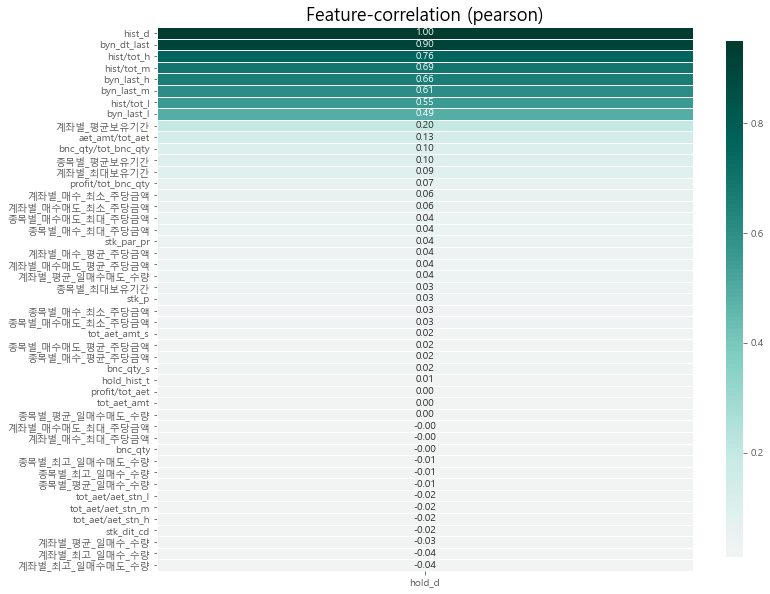

In [23]:
collected = Continuous_feature.copy()
collected['hold_d'] =train_label
klib.corr_plot(data = collected.iloc[:681472,:-1], target=collected['hold_d'])
plt.show()

### 3-2. Statistical verification.

In [24]:
collected_train = Continuous_feature.iloc[:681472,:]

lst_corr = []
lst_pvalue = []
for column in collected_train.columns.tolist():    
    lst_corr.append(stats.pearsonr(collected_train[column].values, train_label.values.flatten())[0])
    lst_pvalue.append(stats.pearsonr(collected_train[column].values, train_label.values.flatten())[1])

pd.DataFrame({'Feature_names': collected_train.columns, '상관계수': lst_corr, 'P-value': lst_pvalue}).sort_values('상관계수', ascending=False)

,Feature_names,상관계수,P-value
0,hist_d,0.999957,0.000000e+00
6,byn_dt_last,0.902579,0.000000e+00
7,hist/tot_h,0.758747,0.000000e+00
9,hist/tot_m,0.692975,0.000000e+00
10,byn_last_h,0.662814,0.000000e+00
12,byn_last_m,0.607850,0.000000e+00
8,hist/tot_l,0.550475,0.000000e+00
11,byn_last_l,0.485739,0.000000e+00
29,계좌별_평균보유기간,0.200587,0.000000e+00
22,aet_amt/tot_aet,0.127723,0.000000e+00


### 3-3. correlation

Displaying absolute correlations above the threshold (0.9). Specify a positive "threshold" to limit the results further.


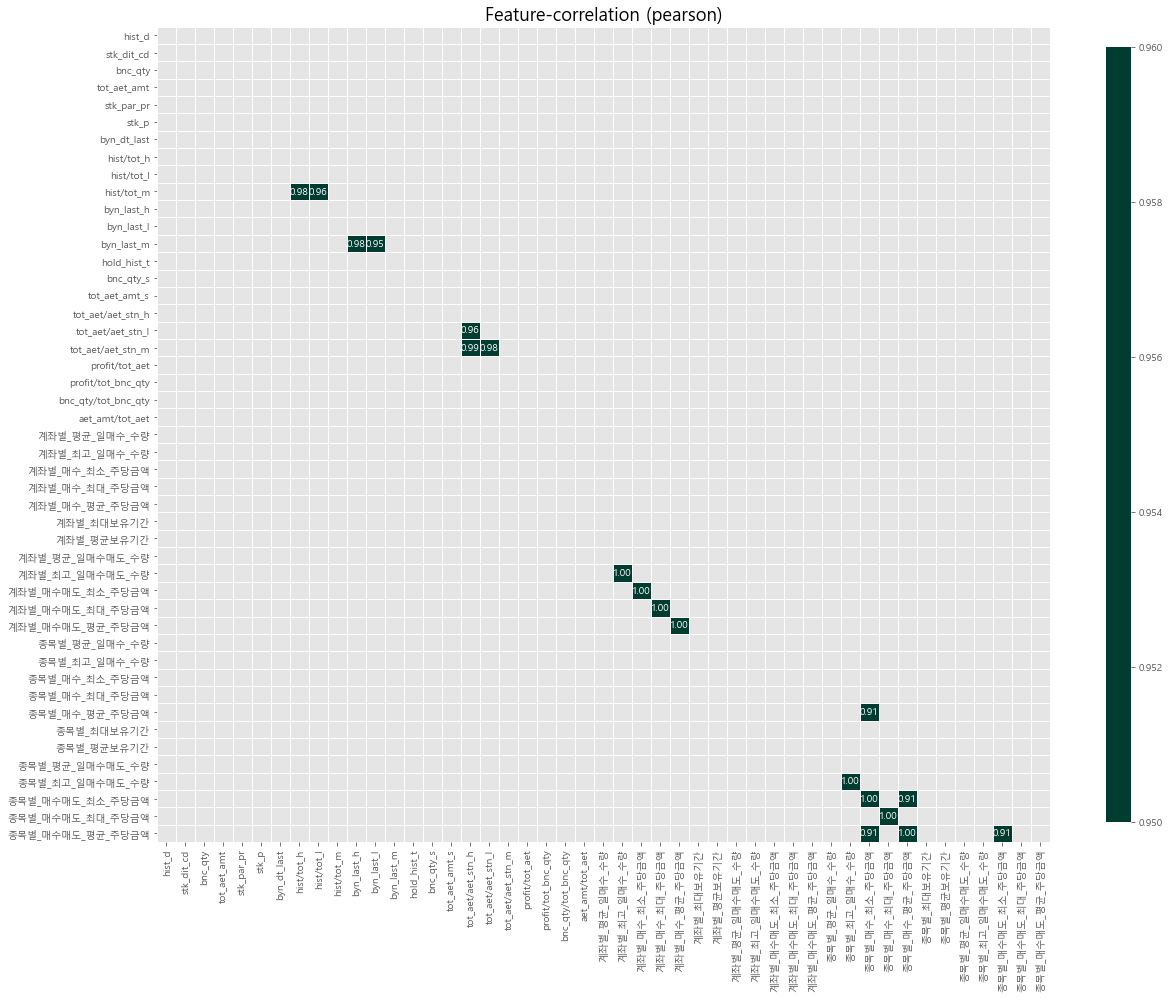

In [25]:
klib.corr_plot(Continuous_feature, figsize = (20,15), split='high', threshold = 0.9)
plt.show()

In [26]:
drop_list = ['hist/tot_m','byn_last_m','tot_aet/aet_stn_l',
             '계좌별_최고_일매수_수량','계좌별_매수매도_최소_주당금액','계좌별_매수매도_평균_주당금액',
            '계좌별_매수_최대_주당금액','종목별_매수_평균_주당금액','종목별_최고_일매수매도_수량',
            '종목별_매수매도_최소_주당금액','종목별_매수매도_평균_주당금액','종목별_매수매도_최대_주당금액']
Continuous_feature.drop(drop_list,axis=1,inplace=True)
Continuous_feature.reset_index(drop=True,inplace=True)

In [27]:
display(Continuous_feature.head())
print(Continuous_feature.shape)

,hist_d,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p,byn_dt_last,hist/tot_h,hist/tot_l,byn_last_h,byn_last_l,hold_hist_t,bnc_qty_s,tot_aet_amt_s,tot_aet/aet_stn_h,tot_aet/aet_stn_m,profit/tot_aet,profit/tot_bnc_qty,bnc_qty/tot_bnc_qty,aet_amt/tot_aet,계좌별_평균_일매수_수량,계좌별_매수_최소_주당금액,계좌별_매수_평균_주당금액,계좌별_최대보유기간,계좌별_평균보유기간,계좌별_평균_일매수매도_수량,계좌별_최고_일매수매도_수량,계좌별_매수매도_최대_주당금액,종목별_평균_일매수_수량,종목별_최고_일매수_수량,종목별_매수_최소_주당금액,종목별_매수_최대_주당금액,종목별_최대보유기간,종목별_평균보유기간,종목별_평균_일매수매도_수량
0,5.0,1,274.0,11782000.0,5000.0,43000.0,5.0,0.001370,0.002741,0.001370,0.002741,6,836.0,33585800.0,0.392733,0.58910,0.008488,756.717943,0.007567,0.030762,391.306122,1205.0,77150.068027,434,52.291139,10.407942,6000.0,2639000.0,81.929386,4180.0,15050.0,54500.0,1199,86.673759,5.019541
1,40.0,1,2.0,4990000.0,5000.0,2495000.0,40.0,0.010962,0.021930,0.010962,0.021930,9,2094.0,177414100.0,0.166333,0.24950,0.020040,5.523489,0.000055,0.013029,391.306122,1205.0,77150.068027,434,52.291139,10.407942,6000.0,2639000.0,58.553245,33663.0,37450.0,2861000.0,1227,160.183769,4.892984
2,2.0,99,786.0,14619600.0,1000.0,18600.0,2.0,0.000548,0.001096,0.000548,0.001096,3,986.0,18499600.0,0.487320,0.73098,0.006840,2170.731034,0.021707,0.038171,391.306122,1205.0,77150.068027,434,52.291139,10.407942,6000.0,2639000.0,163.768445,12624.0,2745.0,28350.0,724,64.793496,3.230341
3,11.0,1,60.0,462000.0,500.0,7700.0,11.0,0.003015,0.006031,0.003015,0.006031,2,60.0,462000.0,0.015400,0.02310,0.216450,165.704659,0.001657,0.001206,391.306122,1205.0,77150.068027,434,52.291139,10.407942,6000.0,2639000.0,420.110738,13096.0,3695.0,12800.0,923,63.845113,24.012728
4,162.0,99,183.0,8125200.0,5000.0,44400.0,76.0,0.044396,0.088816,0.020828,0.041667,4,329.0,12863700.0,0.270840,0.40626,0.012307,505.399210,0.005054,0.021214,391.306122,1205.0,77150.068027,434,52.291139,10.407942,6000.0,2639000.0,49.827094,1600.0,18700.0,50100.0,640,70.685950,1.714903


(752068, 35)


In [28]:
Continuous_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752068 entries, 0 to 752067
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hist_d               752068 non-null  float64
 1   stk_dit_cd           752068 non-null  int64  
 2   bnc_qty              752068 non-null  float64
 3   tot_aet_amt          752068 non-null  float64
 4   stk_par_pr           752068 non-null  float64
 5   stk_p                752068 non-null  float64
 6   byn_dt_last          752068 non-null  float64
 7   hist/tot_h           752068 non-null  float64
 8   hist/tot_l           752068 non-null  float64
 9   byn_last_h           752068 non-null  float64
 10  byn_last_l           752068 non-null  float64
 11  hold_hist_t          752068 non-null  int64  
 12  bnc_qty_s            752068 non-null  float64
 13  tot_aet_amt_s        752068 non-null  float64
 14  tot_aet/aet_stn_h    752068 non-null  float64
 15  tot_aet/aet_stn_m

### 3-4 Category Feature one hot

In [29]:
category

['sex_dit_cd',
 'cus_age_stn_cd',
 'ivs_icn_cd',
 'cus_aet_stn_cd',
 'mrz_pdt_tp_sgm_cd',
 'lsg_sgm_cd',
 'tco_cus_grd_cd',
 'tot_ivs_te_sgm_cd',
 'mrz_btp_dit_cd',
 'btp_cfc_cd',
 'mkt_pr_tal_scl_tp_cd']

In [30]:
one = ['cus_age_stn_cd','ivs_icn_cd','cus_aet_stn_cd','mrz_pdt_tp_sgm_cd','lsg_sgm_cd',
      'tco_cus_grd_cd','tot_ivs_te_sgm_cd','mrz_btp_dit_cd','btp_cfc_cd','mkt_pr_tal_scl_tp_cd']


for i,j in enumerate(one):
    if i ==0:
        odf = pd.get_dummies(category_feature[j])
        col = []
        for k in odf.columns:
            col.append(f'{j}_{k}')
        odf.columns = col
    else:
        hdf = pd.get_dummies(category_feature[j])
        col = []
        for k in hdf.columns:
            col.append(f'{j}_{k}')
        hdf.columns = col
        odf = pd.concat([odf,hdf],axis=1)

In [31]:
category_feature = odf

In [32]:
display(category_feature.head())
print(category_feature.shape)

,cus_age_stn_cd_1,cus_age_stn_cd_2,cus_age_stn_cd_3,cus_age_stn_cd_4,cus_age_stn_cd_5,cus_age_stn_cd_6,cus_age_stn_cd_7,cus_age_stn_cd_8,cus_age_stn_cd_9,ivs_icn_cd_0,ivs_icn_cd_1,ivs_icn_cd_2,ivs_icn_cd_3,ivs_icn_cd_4,ivs_icn_cd_5,ivs_icn_cd_9,ivs_icn_cd_99,cus_aet_stn_cd_1,cus_aet_stn_cd_2,cus_aet_stn_cd_3,cus_aet_stn_cd_4,cus_aet_stn_cd_5,cus_aet_stn_cd_6,mrz_pdt_tp_sgm_cd_1,mrz_pdt_tp_sgm_cd_2,mrz_pdt_tp_sgm_cd_3,mrz_pdt_tp_sgm_cd_5,mrz_pdt_tp_sgm_cd_6,mrz_pdt_tp_sgm_cd_8,mrz_pdt_tp_sgm_cd_9,mrz_pdt_tp_sgm_cd_10,mrz_pdt_tp_sgm_cd_11,mrz_pdt_tp_sgm_cd_12,mrz_pdt_tp_sgm_cd_15,lsg_sgm_cd_2,lsg_sgm_cd_3,lsg_sgm_cd_4,lsg_sgm_cd_5,lsg_sgm_cd_6,lsg_sgm_cd_7,lsg_sgm_cd_8,lsg_sgm_cd_9,tco_cus_grd_cd_1,tco_cus_grd_cd_2,tco_cus_grd_cd_3,tco_cus_grd_cd_4,tco_cus_grd_cd_5,tco_cus_grd_cd_9,tco_cus_grd_cd_99,tot_ivs_te_sgm_cd_1,tot_ivs_te_sgm_cd_2,tot_ivs_te_sgm_cd_3,tot_ivs_te_sgm_cd_4,tot_ivs_te_sgm_cd_5,tot_ivs_te_sgm_cd_6,mrz_btp_dit_cd_1,mrz_btp_dit_cd_2,mrz_btp_dit_cd_3,mrz_btp_dit_cd_4,mrz_btp_dit_cd_5,mrz_btp_dit_cd_6,mrz_btp_dit_cd_7,mrz_btp_dit_cd_8,mrz_btp_dit_cd_9,mrz_btp_dit_cd_10,mrz_btp_dit_cd_11,mrz_btp_dit_cd_12,mrz_btp_dit_cd_13,mrz_btp_dit_cd_14,mrz_btp_dit_cd_15,mrz_btp_dit_cd_16,btp_cfc_cd_14,mkt_pr_tal_scl_tp_cd_1,mkt_pr_tal_scl_tp_cd_2,mkt_pr_tal_scl_tp_cd_3,mkt_pr_tal_scl_tp_cd_99
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


(752068, 76)


### 3-5. Category_feature PCA

In [33]:
oh_f_tr = category_feature.iloc[:681472,:] #train
oh_f_te = category_feature.iloc[681472:,:] #test

In [34]:
max_col = oh_f_tr.shape[1] # 차원축소하려는 데이터의 column의 개수
pca = PCA(n_components=max_col, random_state=0).fit(oh_f_tr)

cumsum = np.cumsum(pca.explained_variance_ratio_) # 분산의 설명량을 누적합
num_col = np.argmax(cumsum >= 0.95) + 1 # 분산의 설명량이 95%이상 되는 차원의 수

# 차원축소
pca = PCA(n_components = num_col, random_state=0)
pca_tr = pca.fit_transform(oh_f_tr)
pca_te = pca.transform(oh_f_te)
pca_f_tr = pd.DataFrame(pca_tr)
pca_f_te = pd.DataFrame(pca_te)

In [35]:
category_feature = pd.concat([pca_f_tr,pca_f_te])
col = []
for i in category_feature:
    col.append(f'pca_{i}')
category_feature.columns = col
category_feature.reset_index(drop=True,inplace=True)

In [36]:
display(category_feature.head())
print(category_feature.shape)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36
0,0.252054,0.493103,1.169701,0.323112,0.291077,-0.613599,-0.134122,0.241614,-0.304018,-0.002141,0.573250,0.733067,-0.502705,0.048057,-0.180382,0.361403,0.542272,0.622988,-0.505412,0.326394,-0.440398,-0.335233,0.037238,0.072999,-0.125442,-0.273243,0.235659,-0.407132,-0.230864,0.871213,-0.586400,0.531391,-0.245872,0.114658,-0.012519,-0.181315,-0.128399
1,0.252054,0.493103,1.169701,0.323112,0.291077,-0.613599,-0.134122,0.241614,-0.304018,-0.002141,0.573250,0.733067,-0.502705,0.048057,-0.180382,0.361403,0.542272,0.622988,-0.505412,0.326394,-0.440398,-0.335233,0.037238,0.072999,-0.125442,-0.273243,0.235659,-0.407132,-0.230864,0.871213,-0.586400,0.531391,-0.245872,0.114658,-0.012519,-0.181315,-0.128399
2,0.271667,0.567320,1.005716,0.270820,0.188129,0.356687,0.517413,-0.479833,-0.218878,0.148161,0.735733,0.698621,-0.523450,0.080364,-0.187228,0.379418,0.574773,0.634220,-0.490102,0.316650,-0.449204,-0.335743,0.059328,0.004797,-0.107822,-0.267629,0.227694,-0.392102,-0.229966,0.877420,-0.580044,0.514411,-0.241841,0.107361,-0.010332,-0.166572,-0.122772
3,0.271667,0.567320,1.005716,0.270820,0.188129,0.356687,0.517413,-0.479833,-0.218878,0.148161,0.735733,0.698621,-0.523450,0.080364,-0.187228,0.379418,0.574773,0.634220,-0.490102,0.316650,-0.449204,-0.335743,0.059328,0.004797,-0.107822,-0.267629,0.227694,-0.392102,-0.229966,0.877420,-0.580044,0.514411,-0.241841,0.107361,-0.010332,-0.166572,-0.122772
4,0.307229,0.853838,0.194931,0.140299,0.705785,-0.558155,0.164987,-0.481071,-0.268952,0.196665,0.735933,0.632021,-0.540569,0.063290,-0.187239,0.398774,0.600225,0.627659,-0.481876,0.341737,-0.454864,-0.343917,0.078221,-0.009622,-0.106043,-0.262558,0.218863,-0.380659,-0.233966,0.867870,-0.567309,0.521478,-0.247646,0.106528,-0.007187,-0.162329,-0.116691


(752068, 37)


### 3-6 Feature Selection

In [46]:
df = pd.concat([Continuous_feature,category_feature],axis=1)

In [37]:
train_data = df.iloc[:681472,:]
test_data = df.iloc[681472:,:]

100%|██████████████████████████████████████████████████████████████████████████████| 95/95 [17:09:16<00:00, 650.07s/it]

(5, 1.108336623393859)


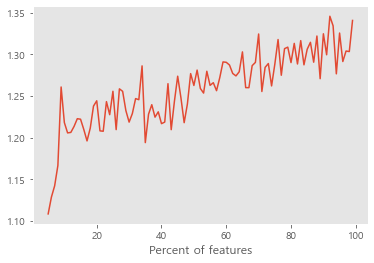

In [38]:
extra_reg = ExtraTreesRegressor(n_jobs=-1)
model = extra_reg   

cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(train_data.values, train_label.values)
    if X_new.shape[1] == 0: continue 
    cv_score = cross_val_score(model, X_new, train_label.values, scoring='neg_mean_squared_error', cv=5)
    rmse_score_mean = (np.sqrt((-cv_score).mean()))
    cv_scores.append((p, rmse_score_mean))

# Print the best percentile
best_score = cv_scores[np.argmin([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()
plt.show()

In [39]:
cv_scores

[(5, 1.108336623393859),
 (6, 1.1284700486340857),
 (7, 1.1420213716804075),
 (8, 1.1664435927261194),
 (9, 1.2606536842237992),
 (10, 1.2179385066913861),
 (11, 1.2055629193467194),
 (12, 1.2061544576925596),
 (13, 1.2133540207438231),
 (14, 1.2225957623860162),
 (15, 1.2219830397828602),
 (16, 1.2097101875294416),
 (17, 1.1959525844475574),
 (18, 1.2113252865730824),
 (19, 1.2377316137099263),
 (20, 1.2440888093598326),
 (21, 1.2080110875006662),
 (22, 1.2075526463064523),
 (23, 1.2430948083562379),
 (24, 1.2274148204316073),
 (25, 1.2555151398514233),
 (26, 1.2094971997938213),
 (27, 1.2584511682841688),
 (28, 1.2554360552447683),
 (29, 1.2323185452330885),
 (30, 1.218507334184633),
 (31, 1.228792901799838),
 (32, 1.246731360676787),
 (33, 1.2454233927359364),
 (34, 1.285976127422102),
 (35, 1.193908014212554),
 (36, 1.228016878165377),
 (37, 1.2393998860501307),
 (38, 1.2244664915168832),
 (39, 1.230825728572629),
 (40, 1.2166619176516709),
 (41, 1.2185339348291506),
 (42, 1.264622

In [40]:
# 38퍼센트의 trainset을 추출함
selected_p = SelectPercentile(percentile=38).fit(train_data, train_label)
selected_train = selected_p.transform(train_data)

In [41]:
# 선택된 피쳐의 열 이름을 추출함
feature_idx = selected_p.get_support()
feature_name = train_data.columns[feature_idx].tolist()

In [42]:
feature_name

['hist_d',
 'stk_dit_cd',
 'tot_aet_amt',
 'stk_par_pr',
 'stk_p',
 'byn_dt_last',
 'hist/tot_h',
 'hist/tot_l',
 'byn_last_h',
 'byn_last_l',
 'bnc_qty_s',
 'tot_aet_amt_s',
 'profit/tot_bnc_qty',
 'bnc_qty/tot_bnc_qty',
 'aet_amt/tot_aet',
 '계좌별_평균_일매수_수량',
 '계좌별_매수_최소_주당금액',
 '계좌별_매수_평균_주당금액',
 '계좌별_최대보유기간',
 '계좌별_평균보유기간',
 '계좌별_최고_일매수매도_수량',
 '종목별_매수_최소_주당금액',
 '종목별_매수_최대_주당금액',
 '종목별_평균보유기간',
 'pca_1',
 'pca_2',
 'pca_5']

In [43]:
# 최종적으로 모델에 사용할 훈련데이터와 테스트 데이터를 결정함
test_data = test_data[feature_name]
train_data = pd.DataFrame(selected_train,columns = feature_name)

In [44]:
df = pd.concat([train_data,test_data]).reset_index(drop=True)
df

,hist_d,stk_dit_cd,tot_aet_amt,stk_par_pr,stk_p,byn_dt_last,hist/tot_h,hist/tot_l,byn_last_h,byn_last_l,bnc_qty_s,tot_aet_amt_s,profit/tot_bnc_qty,bnc_qty/tot_bnc_qty,aet_amt/tot_aet,계좌별_평균_일매수_수량,계좌별_매수_최소_주당금액,계좌별_매수_평균_주당금액,계좌별_최대보유기간,계좌별_평균보유기간,계좌별_최고_일매수매도_수량,종목별_매수_최소_주당금액,종목별_매수_최대_주당금액,종목별_평균보유기간,pca_1,pca_2,pca_5
0,5.0,1.0,11782000.0,5000.0,43000.0,5.0,0.001370,0.002741,0.001370,0.002741,836.0,33585800.0,756.717943,0.007567,0.030762,391.306122,1205.0,77150.068027,434.0,52.291139,6000.0,15050.0,54500.0,86.673759,0.493103,1.169701,-0.613599
1,40.0,1.0,4990000.0,5000.0,2495000.0,40.0,0.010962,0.021930,0.010962,0.021930,2094.0,177414100.0,5.523489,0.000055,0.013029,391.306122,1205.0,77150.068027,434.0,52.291139,6000.0,37450.0,2861000.0,160.183769,0.493103,1.169701,-0.613599
2,2.0,99.0,14619600.0,1000.0,18600.0,2.0,0.000548,0.001096,0.000548,0.001096,986.0,18499600.0,2170.731034,0.021707,0.038171,391.306122,1205.0,77150.068027,434.0,52.291139,6000.0,2745.0,28350.0,64.793496,0.567320,1.005716,0.356687
3,11.0,1.0,462000.0,500.0,7700.0,11.0,0.003015,0.006031,0.003015,0.006031,60.0,462000.0,165.704659,0.001657,0.001206,391.306122,1205.0,77150.068027,434.0,52.291139,6000.0,3695.0,12800.0,63.845113,0.567320,1.005716,0.356687
4,162.0,99.0,8125200.0,5000.0,44400.0,76.0,0.044396,0.088816,0.020828,0.041667,329.0,12863700.0,505.399210,0.005054,0.021214,391.306122,1205.0,77150.068027,434.0,52.291139,6000.0,18700.0,50100.0,70.685950,0.853838,0.194931,-0.558155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752063,23.0,1.0,198500.0,500.0,198500.0,23.0,0.006303,0.012610,0.006303,0.012610,17.0,3391500.0,3937.007874,0.003937,0.041878,27.466825,890.0,66568.856635,1179.0,348.857143,5000.0,129500.0,304000.0,83.784314,-0.477592,0.632928,-0.932688
752064,103.0,99.0,372000.0,5000.0,7440.0,103.0,0.028227,0.056469,0.028227,0.056469,3980.0,30597600.0,196850.393701,0.196850,0.078481,27.466825,890.0,66568.856635,1179.0,348.857143,5000.0,5590.0,9950.0,103.316667,-0.344456,0.270705,-0.599094
752065,858.0,99.0,3677793.0,100.0,49.0,119.0,0.784278,2.350685,0.108775,0.326027,75057.0,3677793.0,499029.294044,0.998059,0.138775,1714.207071,49.0,34235.530303,992.0,47.964286,75057.0,47.0,78.0,2.333333,0.286987,-0.708294,-0.215412
752066,11.0,99.0,11424000.0,2500.0,119000.0,11.0,0.010055,0.030137,0.010055,0.030137,638.0,80874500.0,638.272409,0.001277,0.431065,1714.207071,49.0,34235.530303,992.0,47.964286,75057.0,57500.0,139000.0,51.475862,0.000469,0.102491,0.699429


In [45]:
df.to_csv('../Data/Feature.csv',index=False)